In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)  # ignore warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)  # ignore runtime warnings
warnings.simplefilter(action="ignore", category=FutureWarning)  # ignore future warnings

In [2]:
dataUSA_2 = pd.read_parquet("dataUSA_2_MA_V.parquet")

dataUSA_2.head()

,close_MA,close_V,r_MA,r_V,av_ratio_mv,sds_ratio_mv,spread_avratio_mv,spread_sdsratio_mv,std_spread_avratio_mv,std_spread_sdsratio_mv,upper_bound_avratio,lower_bound_avratio,upper_bound_sdsratio,lower_bound_sdsratio,pos_avratio_mv,n_trans_avratio_mv,pnl_gross_avratio_mv,pnl_net_avratio_mv
timestamp,,,,,,,,,,,,,,,,,,
2025-01-02 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2025-01-02 09:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2025-01-02 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2025-01-02 09:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2025-01-02 09:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [3]:
dataUSA_2.columns

Index(['close_MA', 'close_V', 'r_MA', 'r_V', 'av_ratio_mv', 'sds_ratio_mv',
       'spread_avratio_mv', 'spread_sdsratio_mv', 'std_spread_avratio_mv',
       'std_spread_sdsratio_mv', 'upper_bound_avratio', 'lower_bound_avratio',
       'upper_bound_sdsratio', 'lower_bound_sdsratio', 'pos_avratio_mv',
       'n_trans_avratio_mv', 'pnl_gross_avratio_mv', 'pnl_net_avratio_mv'],
      dtype='object')

## **Correlation** based filtering

In [4]:
correlation_p = dataUSA_2['close_MA'].corr(dataUSA_2['close_V'])
correlation_r = dataUSA_2['r_MA'].corr(dataUSA_2['r_V'])

print("MA and V closing price correlation:")
print(correlation_p)

print("MA and V returns correlation:")
print(correlation_r)

MA and V closing price correlation:
0.7624724926567009
MA and V returns correlation:
0.6777784983717369


In [5]:
correlation_p_daily = dataUSA_2.resample("D").apply(lambda x: x['close_MA'].corr(x['close_V']))
correlation_r_daily = dataUSA_2.resample("D").apply(lambda x: x['r_MA'].corr(x['r_V']))

correlation_p_daily = correlation_p_daily.dropna()
correlation_r_daily = correlation_r_daily.dropna()

<Axes: title={'center': 'Daily correlation between MA and V prices'}, xlabel='timestamp'>

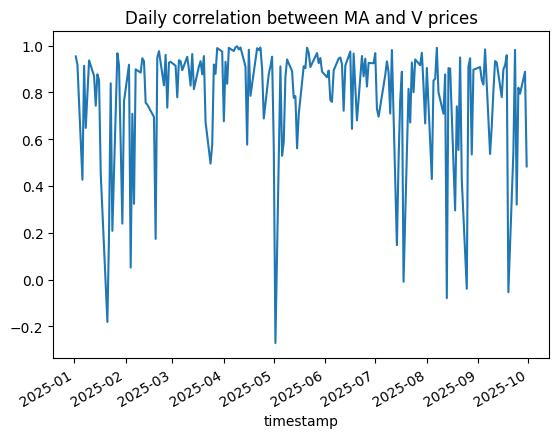

In [6]:
correlation_p_daily.plot(title="Daily correlation between MA and V prices")


In [7]:
print("Share of days with correlation above 0.6:", 
      (correlation_p_daily > 0.6).sum() / len(correlation_p_daily))

print("Share of days with correlation above 0.7:", 
      (correlation_p_daily > 0.7).sum() / len(correlation_p_daily))

print("Share of days with correlation above 0.8:", 
      (correlation_p_daily > 0.8).sum() / len(correlation_p_daily))

print("Share of days with correlation above 0.9:", 
      (correlation_p_daily > 0.9).sum() / len(correlation_p_daily))


Share of days with correlation above 0.6: 0.8225806451612904
Share of days with correlation above 0.7: 0.7634408602150538
Share of days with correlation above 0.8: 0.6451612903225806
Share of days with correlation above 0.9: 0.43548387096774194


<Axes: title={'center': 'Daily correlation between MA and V returns'}, xlabel='timestamp'>

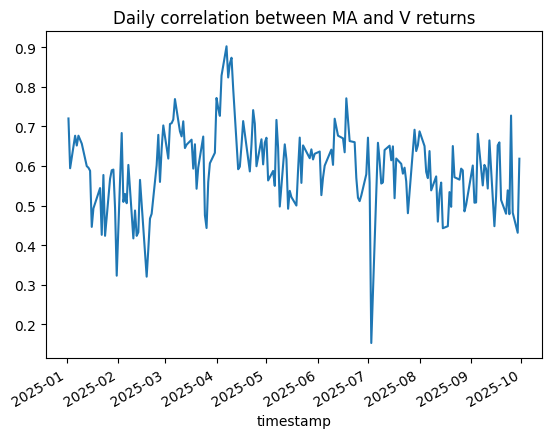

In [8]:
correlation_r_daily.plot(title="Daily correlation between MA and V returns")

In [9]:
print("Share of days with returns correlation above 0.6:", 
      (correlation_r_daily > 0.6).sum() / len(correlation_r_daily))
print("Share of days with returns correlation above 0.7:", 
      (correlation_r_daily > 0.7).sum() / len(correlation_r_daily))
print("Share of days with returns correlation above 0.8:", 
      (correlation_r_daily > 0.8).sum() / len(correlation_r_daily))

Share of days with returns correlation above 0.6: 0.4946236559139785
Share of days with returns correlation above 0.7: 0.12365591397849462
Share of days with returns correlation above 0.8: 0.026881720430107527


In [10]:
daily_correlations = pd.DataFrame({
    "correlation_prices": correlation_p_daily,
    "correlation_returns": correlation_r_daily
})

# Regression based filtering

In [11]:
import statsmodels.api as sm

dataUSA_2_nonan = dataUSA_2.dropna(subset=["close_MA", "close_V", "r_MA", "r_V"])

X = dataUSA_2_nonan["close_V"]
y = dataUSA_2_nonan["close_MA"]
X = sm.add_constant(X)  
model_ols = sm.OLS(y, X).fit()

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               close_MA   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                 9.815e+04
Date:                Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:01:14   Log-Likelihood:            -2.9765e+05
No. Observations:               70680   AIC:                         5.953e+05
Df Residuals:                   70678   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6102      1.559     43.354      0.0

In [12]:
# lets check it on a daily basis

# we define a function performing regression for a given 
# dataframe and returning relevant statistics

import numpy as np
import pandas as pd
import statsmodels.api as sm

def regression_selected(df, y_col, x_col, add_const=True):

    # If the group is empty return NaNs
    if df.empty:
        return pd.Series({
            'beta': np.nan,
            'pvalue': np.nan,
            'tstat': np.nan,
            'r2': np.nan
        })

    y = df[y_col]
    X = df[[x_col]]  # keep as DataFrame

    if add_const:
        X = sm.add_constant(X)
        x_param_name = x_col      # slope name in params/pvalues/etc.
    else:
        x_param_name = x_col      # only column present

    model = sm.OLS(y, X).fit()

    return pd.Series({
        'beta':   model.params[x_param_name],
        'pvalue': model.pvalues[x_param_name],
        'tstat':  model.tvalues[x_param_name],
        'r2':     model.rsquared
    })


In [14]:
regression_selected(dataUSA_2_nonan, y_col="close_MA", x_col="close_V")

beta        1.419883
pvalue      0.000000
tstat     313.291186
r2          0.581364
dtype: float64

In [19]:
daily_regressions_P = dataUSA_2_nonan.resample("D").apply(
    lambda g: regression_selected(g, y_col="close_MA", x_col="close_V"))

daily_regressions_P.head()

,beta,pvalue,tstat,r2
timestamp,,,,
2025-01-02,1.708735,4.164578e-200,61.973711,0.910400
2025-01-03,1.524089,8.968331e-155,45.286944,0.844374
2025-01-04,NaN,NaN,NaN,NaN
2025-01-05,NaN,NaN,NaN,NaN
2025-01-06,1.239795,3.056882e-18,9.171654,0.182029


In [20]:
daily_regressions_R = dataUSA_2_nonan.resample("D").apply(
    lambda g: regression_selected(g, y_col="r_MA", x_col="r_V"))

daily_regressions_R.head()

,beta,pvalue,tstat,r2
timestamp,,,,
2025-01-02,0.656429,5.733473e-62,20.176997,0.518540
2025-01-03,0.586717,1.142479e-37,14.370749,0.353314
2025-01-04,NaN,NaN,NaN,NaN
2025-01-05,NaN,NaN,NaN,NaN
2025-01-06,0.718889,3.569483e-52,17.861432,0.457700


In [21]:
daily_regressions_P = daily_regressions_P.dropna()
daily_regressions_R = daily_regressions_R.dropna()

## **Cointegration** based filtering

In [24]:
# lets use PP and KPSS tests for cointegration
# based on the functions from lab03
# extended to control for empty dataframes

from arch.unitroot import PhillipsPerron, KPSS

# the function to get residuals from OLS regression
def _eg_residuals(df: pd.DataFrame, col1: str, col2: str):
    X = sm.add_constant(df[col1].values, has_constant="add")
    y = df[col2].values
    model = sm.OLS(y, X).fit()
    return model.resid

# the function for PP p-value
def eg_pp_pvalue(df: pd.DataFrame, col1: str, col2: str, 
                 trend: str = "c") -> float:
    # If the group is empty return NaN
    if df.empty:
        return np.nan

    resid = _eg_residuals(df, col1, col2)
    return float(PhillipsPerron(resid, trend=trend).pvalue)

# the function for KPSS p-value
def eg_kpss_pvalue(df: pd.DataFrame, col1: str, col2: str, 
                   trend: str = "c") -> float:
    # If the group is empty return NaN
    if df.empty:
        return np.nan
    resid = _eg_residuals(df, col1, col2)
    return float(KPSS(resid, trend=trend).pvalue)

In [25]:
print("p-value of PP test:", eg_pp_pvalue(dataUSA_2_nonan, "close_MA", "close_V"))
print("p-value of KPSS test:", eg_kpss_pvalue(dataUSA_2_nonan, "close_MA", "close_V"))


p-value of PP test: 0.1951067921464943
p-value of KPSS test: 0.0001


In [26]:
daily_PP_tests = dataUSA_2_nonan.resample("D").apply(
    lambda g: eg_pp_pvalue(g, "close_MA", "close_V")
)

daily_KPSS_tests = dataUSA_2_nonan.resample("D").apply(
    lambda g: eg_kpss_pvalue(g, "close_MA", "close_V")
)

# remove NaN values
daily_PP_tests = daily_PP_tests.dropna()
daily_KPSS_tests = daily_KPSS_tests.dropna()

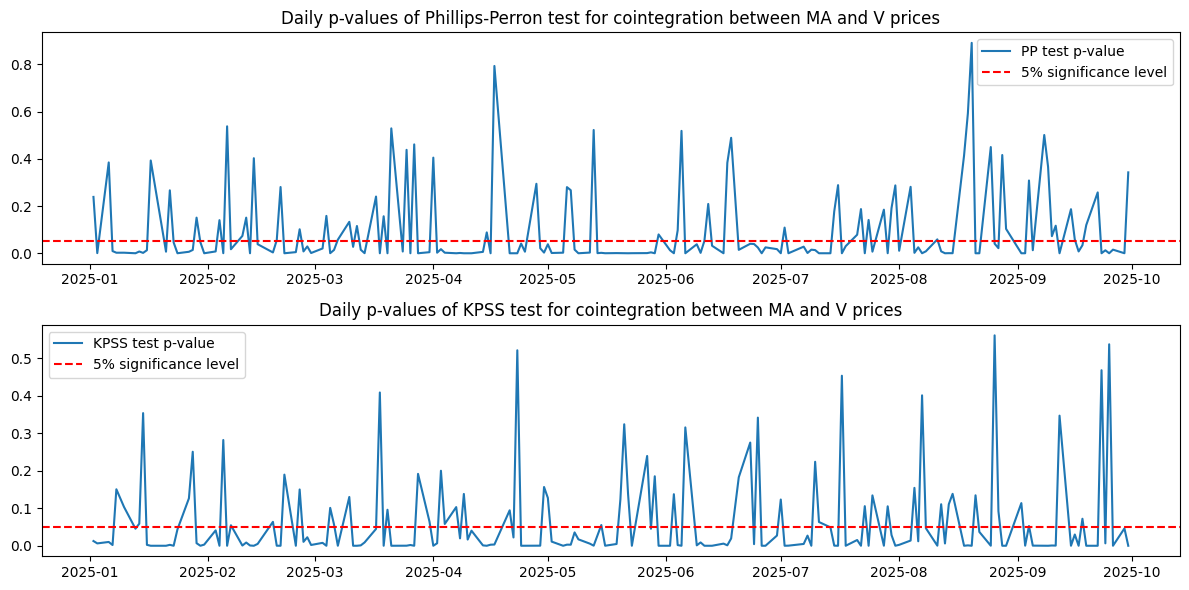

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(daily_PP_tests, label="PP test p-value")
plt.axhline(y=0.05, color='r', linestyle='--', label='5% significance level')
plt.title("Daily p-values of Phillips-Perron test for cointegration between MA and V prices")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(daily_KPSS_tests, label="KPSS test p-value")
plt.axhline(y=0.05, color='r', linestyle='--', label='5% significance level')
plt.title("Daily p-values of KPSS test for cointegration between MA and V prices")
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# and check how many days indicate cointegration

# PP test (null: no cointegration)
print("Share of days with PP test p-value below 0.05 (indicating cointegration):", 
      (daily_PP_tests < 0.05).sum() / len(daily_PP_tests))

# KPSS test (null: cointegration)
print("Share of days with KPSS test p-value above 0.05 (indicating cointegration):", 
      (daily_KPSS_tests > 0.05).sum() / len(daily_KPSS_tests))


Share of days with PP test p-value below 0.05 (indicating cointegration): 0.6612903225806451
Share of days with KPSS test p-value above 0.05 (indicating cointegration): 0.3118279569892473


In [29]:
# lets combine together daily statistics for correlations
# and regression for prices and returns

# we can merge dataframes using pd.concat

combined_daily_stats = pd.concat([
    daily_correlations,
    daily_regressions_P.add_prefix("regression_price_"),
    daily_regressions_R.add_prefix("regression_return_"),
    daily_PP_tests.rename("PP_pvalue"),
    daily_KPSS_tests.rename("KPSS_pvalue")
], axis=1)

combined_daily_stats.head()

,correlation_prices,correlation_returns,filter_prices_6,filter_prices_7,filter_prices_8,filter_prices_9,filter_returns_6,filter_returns_7,filter_returns_8,regression_price_beta,...,regression_price_filter_reg_price_beta_sig_above05,regression_return_beta,regression_return_pvalue,regression_return_tstat,regression_return_r2,regression_return_filter_reg_return_beta_sig_above0,regression_return_filter_reg_return_beta_sig_above025,regression_return_filter_reg_return_beta_sig_above05,PP_pvalue,KPSS_pvalue
2025-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238647,0.012696
2025-01-03,0.954149,0.720097,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000580,0.006398
2025-01-06,0.918899,0.594402,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.708735,...,1.0,0.656429,5.733473e-62,20.176997,0.518540,1.0,1.0,1.0,0.384666,0.010223
2025-01-07,0.426649,0.676535,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.524089,...,1.0,0.586717,1.142479e-37,14.370749,0.353314,1.0,1.0,1.0,0.009230,0.002079
2025-01-08,0.913837,0.651794,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.239795,...,1.0,0.718889,3.569483e-52,17.861432,0.457700,1.0,1.0,1.0,0.002270,0.150875


In [30]:
combined_daily_stats.index = combined_daily_stats.index + pd.to_timedelta(np.where(combined_daily_stats.index.day_name() == "Friday", "3D", "1D")) 

combined_daily_stats.head()

,correlation_prices,correlation_returns,filter_prices_6,filter_prices_7,filter_prices_8,filter_prices_9,filter_returns_6,filter_returns_7,filter_returns_8,regression_price_beta,...,regression_price_filter_reg_price_beta_sig_above05,regression_return_beta,regression_return_pvalue,regression_return_tstat,regression_return_r2,regression_return_filter_reg_return_beta_sig_above0,regression_return_filter_reg_return_beta_sig_above025,regression_return_filter_reg_return_beta_sig_above05,PP_pvalue,KPSS_pvalue
2025-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238647,0.012696
2025-01-06,0.954149,0.720097,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000580,0.006398
2025-01-07,0.918899,0.594402,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.708735,...,1.0,0.656429,5.733473e-62,20.176997,0.518540,1.0,1.0,1.0,0.384666,0.010223
2025-01-08,0.426649,0.676535,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.524089,...,1.0,0.586717,1.142479e-37,14.370749,0.353314,1.0,1.0,1.0,0.009230,0.002079
2025-01-09,0.913837,0.651794,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.239795,...,1.0,0.718889,3.569483e-52,17.861432,0.457700,1.0,1.0,1.0,0.002270,0.150875


In [31]:
combined_daily_stats.describe()

,correlation_prices,correlation_returns,filter_prices_6,filter_prices_7,filter_prices_8,filter_prices_9,filter_returns_6,filter_returns_7,filter_returns_8,regression_price_beta,...,regression_price_filter_reg_price_beta_sig_above05,regression_return_beta,regression_return_pvalue,regression_return_tstat,regression_return_r2,regression_return_filter_reg_return_beta_sig_above0,regression_return_filter_reg_return_beta_sig_above025,regression_return_filter_reg_return_beta_sig_above05,PP_pvalue,KPSS_pvalue
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,1.860000e+02,186.000000,186.000000,186.0,186.0,186.000000,1.860000e+02,186.000000
mean,0.778888,0.596773,0.822581,0.763441,0.645161,0.435484,0.494624,0.123656,0.026882,1.336091,...,0.924731,0.614317,1.482200e-05,15.112793,0.366508,1.0,1.0,0.833333,9.777736e-02,0.064735
std,0.251279,0.102107,0.383054,0.426116,0.479756,0.497158,0.501321,0.330077,0.162174,0.609832,...,0.264537,0.120023,2.021451e-04,4.604634,0.120314,0.0,0.0,0.373684,1.645425e-01,0.113866
min,-0.271443,0.153167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.550328,...,0.000000,0.299853,3.135434e-140,3.013463,0.023460,1.0,1.0,0.000000,3.045619e-15,0.000100
25%,0.709168,0.535015,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999747,...,1.000000,0.524266,1.701838e-48,12.312290,0.286243,1.0,1.0,1.000000,3.130833e-04,0.000101
50%,0.885516,0.599592,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.329569,...,1.000000,0.609114,1.837394e-38,14.566166,0.359510,1.0,1.0,1.000000,1.400539e-02,0.006682
75%,0.933470,0.658187,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.713474,...,1.000000,0.689684,1.706804e-29,16.997547,0.433211,1.0,1.0,1.000000,1.187636e-01,0.094106
max,0.997387,0.902344,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.303621,...,1.000000,0.975523,2.756891e-03,40.702688,0.814224,1.0,1.0,1.000000,8.911617e-01,0.561714


In [32]:
# based on the combined daily statistics
# lets create filtering rules
# storing them as new columns, where
# 1 means that the filter condition is met (trade on that day)
# and 0 means that it is not met (do NOT trade on that day)

# based on correlation between prices
combined_daily_stats['filter_correlation_prices_06'] = (combined_daily_stats['correlation_prices'] > 0.6) * 1
combined_daily_stats['filter_correlation_prices_07'] = (combined_daily_stats['correlation_prices'] > 0.7) * 1
combined_daily_stats['filter_correlation_prices_08'] = (combined_daily_stats['correlation_prices'] > 0.8) * 1
combined_daily_stats['filter_correlation_prices_09'] = (combined_daily_stats['correlation_prices'] > 0.9) * 1
# based on correlation between returns
combined_daily_stats['filter_correlation_returns_06'] = (combined_daily_stats['correlation_returns'] > 0.6) * 1
combined_daily_stats['filter_correlation_returns_07'] = (combined_daily_stats['correlation_returns'] > 0.7) * 1
combined_daily_stats['filter_correlation_returns_08'] = (combined_daily_stats['correlation_returns'] > 0.8) * 1
# based on regression for prices - significant beta above some threshold
combined_daily_stats['filter_regression_price_beta_sig_above0'] = ((combined_daily_stats['regression_price_beta'] > 0) & (combined_daily_stats['regression_price_pvalue'] < 0.05)) * 1
combined_daily_stats['filter_regression_price_beta_sig_above025'] = ((combined_daily_stats['regression_price_beta'] > 0.25) & (combined_daily_stats['regression_price_pvalue'] < 0.05)) * 1
combined_daily_stats['filter_regression_price_beta_sig_above05'] = ((combined_daily_stats['regression_price_beta'] > 0.5) & (combined_daily_stats['regression_price_pvalue'] < 0.05)) * 1
# based on regression for returns - significant beta above some threshold
combined_daily_stats['filter_regression_return_beta_sig_above0'] = ((combined_daily_stats['regression_return_beta'] > 0) & (combined_daily_stats['regression_return_pvalue'] < 0.05)) * 1
combined_daily_stats['filter_regression_return_beta_sig_above025'] = ((combined_daily_stats['regression_return_beta'] > 0.25) & (combined_daily_stats['regression_return_pvalue'] < 0.05)) * 1
combined_daily_stats['filter_regression_return_beta_sig_above05'] = ((combined_daily_stats['regression_return_beta'] > 0.5) & (combined_daily_stats['regression_return_pvalue'] < 0.05)) * 1
# cointegration based filters
combined_daily_stats['filter_PP_cointegration_10'] = (combined_daily_stats['PP_pvalue'] < 0.1) * 1
combined_daily_stats['filter_PP_cointegration_05'] = (combined_daily_stats['PP_pvalue'] < 0.05) * 1
combined_daily_stats['filter_PP_cointegration_01'] = (combined_daily_stats['PP_pvalue'] < 0.01) * 1
combined_daily_stats['filter_KPSS_cointegration_10'] = (combined_daily_stats['KPSS_pvalue'] > 0.1) * 1
combined_daily_stats['filter_KPSS_cointegration_05'] = (combined_daily_stats['KPSS_pvalue'] > 0.05) * 1
combined_daily_stats['filter_KPSS_cointegration_01'] = (combined_daily_stats['KPSS_pvalue'] > 0.01) * 1

In [33]:
daily_pnls = dataUSA_2_nonan.resample("D").agg({
    "pnl_gross_avratio_mv": "sum",
    "pnl_net_avratio_mv": "sum",
    "n_trans_avratio_mv": "sum"
})

# remove weekends with no trading
daily_pnls = daily_pnls[daily_pnls.index.dayofweek < 5]

daily_pnls.head()

,pnl_gross_avratio_mv,pnl_net_avratio_mv,n_trans_avratio_mv
timestamp,,,
2025-01-02,0.000000,0.000000,0.0
2025-01-03,0.209548,-0.913759,2.0
2025-01-06,-3.142002,-4.264747,2.0
2025-01-07,0.939395,-0.178669,2.0
2025-01-08,0.211957,-0.904532,2.0


In [34]:
daily_pnls_filters = pd.concat([daily_pnls, 
                                combined_daily_stats.filter(regex='^filter_')], axis=1)

daily_pnls_filters.head()

,pnl_gross_avratio_mv,pnl_net_avratio_mv,n_trans_avratio_mv,filter_prices_6,filter_prices_7,filter_prices_8,filter_prices_9,filter_returns_6,filter_returns_7,filter_returns_8,...,filter_regression_price_beta_sig_above05,filter_regression_return_beta_sig_above0,filter_regression_return_beta_sig_above025,filter_regression_return_beta_sig_above05,filter_PP_cointegration_10,filter_PP_cointegration_05,filter_PP_cointegration_01,filter_KPSS_cointegration_10,filter_KPSS_cointegration_05,filter_KPSS_cointegration_01
2025-01-02,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,0.209548,-0.913759,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2025-01-06,-3.142002,-4.264747,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2025-01-07,0.939395,-0.178669,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2025-01-08,0.211957,-0.904532,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [35]:
def mySR(x, scale):
    return np.sqrt(scale) * np.nanmean(x) / np.nanstd(x)

print("Gross PnL SR:", mySR(daily_pnls['pnl_gross_avratio_mv'], scale = 252))
print("Net PnL SR:", mySR(daily_pnls['pnl_net_avratio_mv'], scale = 252))

# and average number of trades per day
print("Average number of trades per day:", daily_pnls['n_trans_avratio_mv'].mean())

Gross PnL SR: 2.991056560847613
Net PnL SR: -5.6938121662673415
Average number of trades per day: 1.907216494845361


In [36]:
pnl_gross_avratio_filtered = daily_pnls_filters['pnl_gross_avratio_mv'] * daily_pnls_filters['filter_correlation_prices_06']
pnl_net_avratio_filtered = daily_pnls_filters['pnl_net_avratio_mv'] * daily_pnls_filters['filter_correlation_prices_06']

print("Gross PnL SR after applying filter_correlation_prices_06:", 
      mySR(pnl_gross_avratio_filtered, scale = 252))
print("Net PnL SR after applying filter_correlation_prices_06:", 
      mySR(pnl_net_avratio_filtered, scale = 252))

# and average number of trades per day
n_trades_filtered = daily_pnls_filters['n_trans_avratio_mv'] * daily_pnls_filters['filter_correlation_prices_06']
print("Average number of trades per day after applying filter_correlation_prices_06:", n_trades_filtered.mean())


Gross PnL SR after applying filter_correlation_prices_06: 2.582249524977483
Net PnL SR after applying filter_correlation_prices_06: -4.810779957280137
Average number of trades per day after applying filter_correlation_prices_06: 1.4922279792746114


In [37]:
results_filters = []
for col in daily_pnls_filters.columns:
    if col.startswith('filter_'):
        pnl_gross_filtered = daily_pnls_filters['pnl_gross_avratio_mv'] * daily_pnls_filters[col]
        pnl_net_filtered = daily_pnls_filters['pnl_net_avratio_mv'] * daily_pnls_filters[col]
        n_trades_filtered = daily_pnls_filters['n_trans_avratio_mv'] * daily_pnls_filters[col]
        results_filters.append({
            'filter': col,
            'gross_SR': mySR(pnl_gross_filtered, scale = 252),
            'net_SR': mySR(pnl_net_filtered, scale = 252),
            'gross_PnL': pnl_gross_filtered.sum(),
            'net_PnL': pnl_net_filtered.sum(),
            'avg_n_trades_per_day': n_trades_filtered.mean()
        })

results_filters_df = pd.DataFrame(results_filters)

In [38]:
results_filters_df.sort_values(by = 'net_SR',
                               ascending = False)

,filter,gross_SR,net_SR,gross_PnL,net_PnL,avg_n_trades_per_day
6,filter_returns_8,2.020292,1.424355,12.903206,6.396882,0.065217
13,filter_correlation_returns_08,1.971879,1.390488,12.903206,6.396882,0.062176
12,filter_correlation_returns_07,0.598478,-1.898415,5.945597,-19.246271,0.238342
5,filter_returns_7,0.612962,-1.944970,5.945597,-19.246271,0.250000
23,filter_KPSS_cointegration_10,2.010462,-2.524177,20.417969,-26.183148,0.435233
10,filter_correlation_prices_09,2.029650,-2.817281,35.788070,-48.341433,0.787565
3,filter_prices_9,2.079527,-2.887584,35.788070,-48.341433,0.826087
22,filter_PP_cointegration_01,2.158911,-3.896415,32.170620,-58.726040,0.849741
9,filter_correlation_prices_08,2.432094,-3.946936,48.375918,-76.838324,1.170984
2,filter_prices_8,2.492296,-4.048438,48.375918,-76.838324,1.228261
